In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [13]:
# Import the data set of food
df_food_tweet_information = pd.read_json('/Users/77592/Documents/GitHub/CCC_A2/final_processed_data/s1_data.json').T
columns = ['total_tweet', 'posi_tweet', 'nega_tweet','neutral_tweet', 'positive_percentage', 'negative_percentage','neutral_percentage', 'food_retail_num']
df_food_tweet_information.columns = columns
df_food_tweet_information.head()

,total_tweet,posi_tweet,nega_tweet,neutral_tweet,positive_percentage,negative_percentage,neutral_percentage,food_retail_num
101,491.0,217.0,120.0,154.0,0.441955,0.244399,0.313646,5124.0
102,44.0,25.0,6.0,13.0,0.568182,0.136364,0.295455,7218.0
103,2076.0,896.0,515.0,665.0,0.431599,0.248073,0.320328,4428.0
104,299.0,139.0,67.0,93.0,0.464883,0.224080,0.311037,3315.0
105,554.0,217.0,147.0,190.0,0.391697,0.265343,0.342960,2846.0


**The First Point:**

Exhibit the Overall information about tweets of Food


Overall number of tweets about food: 142966.00 
Overall Food percentage: 0.04
Overall Postive_percentage: 0.46 
Overall Negative_percentage: 0.26 
Overall Neutral_percentage: 0.29 


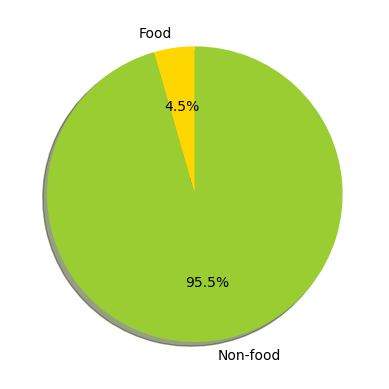

In [32]:
# Overall number of tweets about food v.s. Overall Postive_percentage
number_of_tweets = sum(list(df_food_tweet_information['total_tweet']))
number_of_positive_percentage_tweets = sum(list(df_food_tweet_information['posi_tweet'])) / sum(list(df_food_tweet_information['total_tweet']))
number_of_negative_percentage_tweets = sum(list(df_food_tweet_information['nega_tweet'])) / sum(list(df_food_tweet_information['total_tweet']))
number_of_neutral_percentage_tweets = sum(list(df_food_tweet_information['neutral_tweet'])) / sum(list(df_food_tweet_information['total_tweet']))
ASSUME_TOTAL_TWEETS = 3.2e6
food_percentage = number_of_tweets / ASSUME_TOTAL_TWEETS
print('Overall number of tweets about food: {:.2f} '.format(number_of_tweets))
print( 'Overall Food percentage: {:.2f}'.format(food_percentage))
print('Overall Postive_percentage: {:.2f} '.format(number_of_positive_percentage_tweets))
print('Overall Negative_percentage: {:.2f} '.format(number_of_negative_percentage_tweets))
print('Overall Neutral_percentage: {:.2f} '.format(number_of_neutral_percentage_tweets))

# Print the pie chart of number of tweets about food
pie_data_food_number = [food_percentage, 1-food_percentage]
pie_labels_food_number = ['Food', 'Non-food']
colors_food_number = ['gold', 'yellowgreen']
plt.pie(pie_data_food_number, labels=pie_labels_food_number, colors=colors_food_number, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


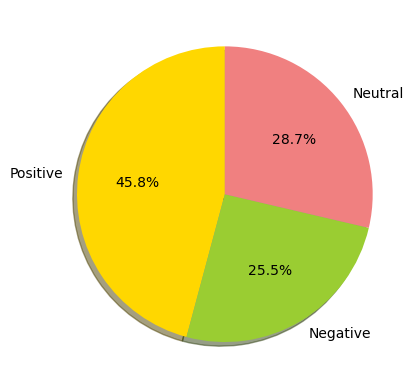

In [33]:
# Print the pie char of sentiments about food
pie_data_food_sentiment = [number_of_positive_percentage_tweets, number_of_negative_percentage_tweets, number_of_neutral_percentage_tweets]
pie_labels_food_sentiment = ['Positive', 'Negative', 'Neutral']
colors_food_sentiment = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(pie_data_food_sentiment, labels=pie_labels_food_sentiment, colors=colors_food_sentiment, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

**2. Only discuss and show the top 10 SA4 areas with the highest number of tweets about food**

Discussion:

The composition of sentiments is similar to the overall.

In [53]:
# Find the top 10 SA4 areas with the most tweets about food
df_food_top10 = df_food_tweet_information.sort_values(by=['total_tweet'], ascending=False).head(10)
df_food_top10

,total_tweet,posi_tweet,nega_tweet,neutral_tweet,positive_percentage,negative_percentage,neutral_percentage,food_retail_num
208,33797.0,15360.0,8628.0,9809.0,0.454478,0.255289,0.290233,7529.0
127,29787.0,13312.0,7927.0,8548.0,0.446906,0.266123,0.286971,8578.0
302,12769.0,5858.0,3303.0,3608.0,0.458767,0.258673,0.282559,4100.0
506,9592.0,4421.0,2443.0,2728.0,0.460905,0.254691,0.284404,11773.0
403,7903.0,3594.0,1996.0,2313.0,0.454764,0.252562,0.292674,8288.0
309,4068.0,1901.0,1071.0,1096.0,0.467306,0.263274,0.269420,13349.0
801,3265.0,1513.0,812.0,940.0,0.463400,0.248698,0.287902,8617.0
204,3048.0,1365.0,852.0,831.0,0.447835,0.279528,0.272638,4353.0
318,2109.0,900.0,615.0,594.0,0.426743,0.291607,0.281650,5652.0
111,2077.0,958.0,376.0,743.0,0.461242,0.181030,0.357727,7597.0


LDA topics modelling for food

In [43]:
# Read the food tokens file
with open('./data/food_token.json', 'r') as food_token_file:
    food_tokens = json.load(food_token_file)

In [62]:
import gensim
from gensim import corpora
import nltk

# Extract and preprocess the tokens for each SA4 area

def preprocess(dataset):
    text_data = []
    en_stop = set(nltk.corpus.stopwords.words('english'))
    for sa4_code in dataset:
        text = set(dataset[sa4_code])
        
        # Remove the stop words and lower the case of words
        text = [word.lower() for word in text if word.lower() not in en_stop]
        text_data.append(text)
    
    # Dictionary encapsulates the mapping between normalized words and their integer ids.
    dictionary = corpora.Dictionary(text_data)

    # no_below: Keep tokens which are contained in at least no_below documents.
    # no_above: Keep tokens which are contained in no more than no_above documents 
    #           (fraction of total corpus size, not an absolute number).

    # dictionary.filter_extremes(no_below=10, no_above=0.5)
    # Filter out the 20 most frequent tokens that appear in the documents.

    dictionary.filter_n_most_frequent(5)

    # convert documents to BOW representations
    corpus = [dictionary.doc2bow(doc) for doc in text_data]
    return corpus, dictionary

preprocessed_food_corpus, preprocessed_food_dictionary = preprocess(food_tokens)
    

In [63]:
# Train the LDA model
num_topics = 10

#alpha = document-topic prior
#eta (beta in lecture) = topic-word prior
model = gensim.models.LdaModel(preprocessed_food_corpus, id2word=preprocessed_food_dictionary,
                               num_topics=num_topics, alpha='auto', eta='auto',
                               passes=10)


In [64]:
for topic_id in range(model.num_topics):
    # extract 10 top words for each topic
    topk = model.show_topic(topic_id, 8)
    topk_words = [ w for w, _ in topk ]

    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: meat apple murphy perch steak leg plate cracker
1: swede shank quince patty brioche puffer currant flank
2: leftovers puff iceberg pancake pumpkin pineapple buffalo vegetable
3: tostada romaine chapati chou matzo swede taro aubergine
4: citron fritter duckling shellfish ghee shortbread eater gingerbread
5: cake brain gem produce green sausage meat seafood
6: fillet snapper veg joint grape takeaway roast pea
7: mullet murphy tomato toast pork cos puff greens
8: date green roll chicken lime joint chocolate fish
9: cut green brain date chicken bird fish cake
